In [8]:
# Read the Parquet file from S3
import pandas as pd

bucket_name = 'intern-project1'
s3_file_path = 'interns/ecommerce_events.parquet'

#df = pd.read_parquet(f's3://{bucket_name}/{s3_file_path}')
df = pd.read_csv("ecommerce_events.csv")
# Display the first few rows to verify the data
# Basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check the unique values in event_type to understand the types of events
print(df['event_type'].unique())

# Descriptive statistics for numerical columns
#print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB
None
event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
dtype: int64
['remove_from_cart' 'view' 'cart' 'purchase']


In [2]:
print(df.describe())

         product_id   category_id         price       user_id
count  3.533286e+06  3.533286e+06  3.533286e+06  3.533286e+06
mean   5.473054e+06  1.555023e+18  8.871856e+00  5.223318e+08
std    1.331331e+06  1.689262e+17  1.986474e+01  8.494819e+07
min    3.752000e+03  1.487580e+18 -7.937000e+01  1.180452e+06
25%    5.726191e+06  1.487580e+18  2.060000e+00  4.866830e+08
50%    5.811429e+06  1.487580e+18  4.210000e+00  5.566496e+08
75%    5.859462e+06  1.487580e+18  7.140000e+00  5.828019e+08
max    5.917178e+06  2.235524e+18  3.277800e+02  5.954145e+08


In [9]:
# Drop columns 'category_code' and 'brand' due to high percentage of missing data
df.drop(columns=['category_code', 'brand'], inplace=True)

# Handle other missing values if any (like price or others)
df['price'].fillna(df['price'].median(), inplace=True)

# Confirm that missing values have been handled
print(df.isnull().sum())


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_38516\316730918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


event_time        0
event_type        0
product_id        0
category_id       0
price             0
user_id           0
user_session    779
dtype: int64


In [10]:
# Convert 'event_time' to datetime format
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract date and time from 'event_time'
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour

# Drop the original 'event_time' column if not needed
df.drop(columns=['event_time'], inplace=True)

# One-hot encode the 'event_type' column
df = pd.get_dummies(df, columns=['event_type'], drop_first=True)

# Verify the new columns
print(df[['event_date', 'event_hour']].head())


   event_date  event_hour
0  2019-12-01           0
1  2019-12-01           0
2  2019-12-01           0
3  2019-12-01           0
4  2019-12-01           0


In [13]:
print(df)

         product_id          category_id   price    user_id  \
0           5712790  1487580005268456287    6.27  576802932   
1           5764655  1487580005411062629   29.05  412120092   
2              4958  1487580009471148064    1.19  494077766   
3           5848413  1487580007675986893    0.79  348405118   
4           5824148  1487580005511725929    5.56  576005683   
...             ...                  ...     ...        ...   
3533281     5683350  1487580005671109489    2.84  536812729   
3533282     5888097  1487580013388628160  179.05  503658154   
3533283       59975  1487580012096782476    7.14  595414541   
3533284     5775982  1783999063314661546   11.90  397780878   
3533285     5635090  1487580005754995573    4.44  420652863   

                                 user_session  event_date  event_hour  \
0        51d85cb0-897f-48d2-918b-ad63965c12dc  2019-12-01           0   
1        8adff31e-2051-4894-9758-224bfa8aec18  2019-12-01           0   
2        c99a50e8-2fac-4

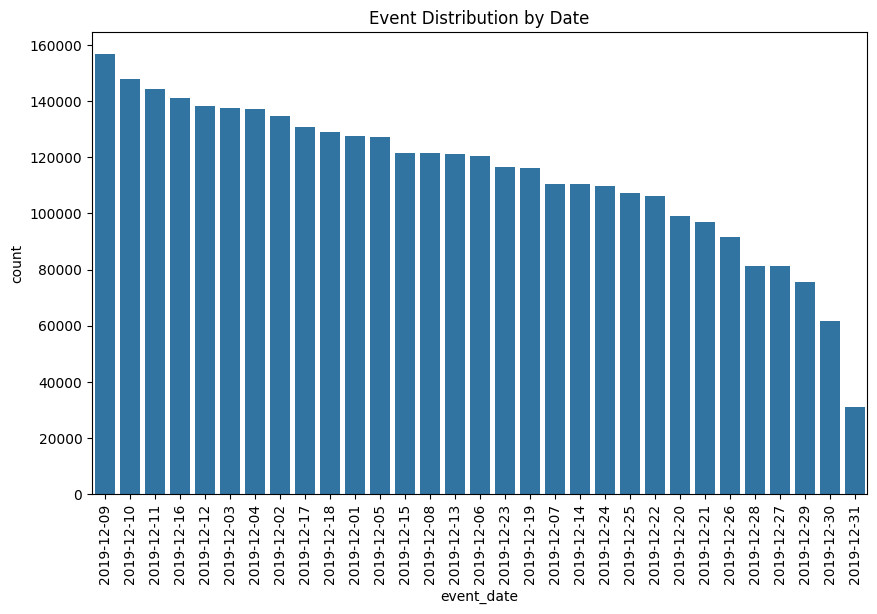

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of events over time (date)
plt.figure(figsize=(10, 6))
sns.countplot(x='event_date', data=df, order=df['event_date'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Event Distribution by Date')
plt.show()

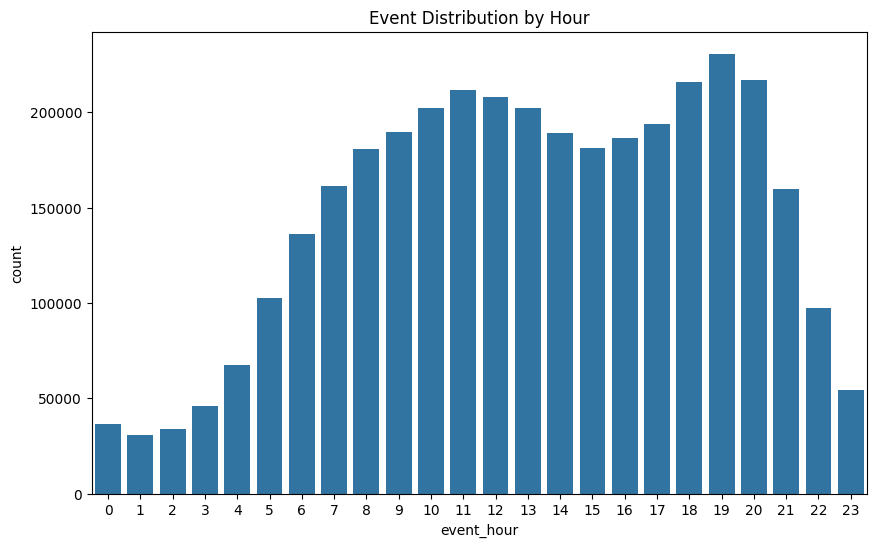

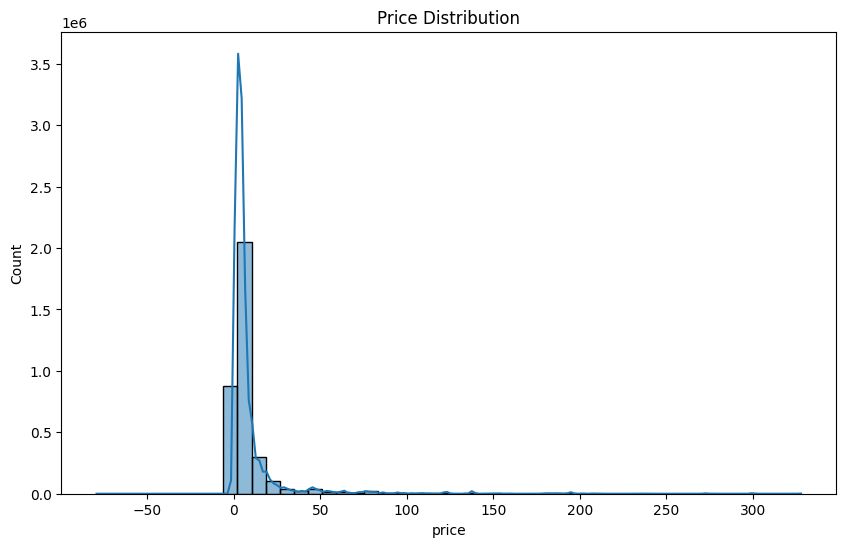

In [15]:
# Plot the distribution of events by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='event_hour', data=df)
plt.title('Event Distribution by Hour')
plt.show()

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()